In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# Definicao de variaveis do problema
t, g, m1, m2, L1, L2 = sp.symbols('t g m1 m2 L1 L2')
the1 = sp.Function(r'\theta_1')(t)
the2 = sp.Function(r'\theta_2')(t)

In [3]:
# Definicao de velocidade e aceleracao angulares
the1_d = sp.diff(the1, t)
the2_d = sp.diff(the2, t)
the1_dd = sp.diff(the1, t, t)
the2_dd = sp.diff(the2, t, t)

In [4]:
# Posicoes das massas em funcao de theta_i
x1 = L1*sp.sin(the1)
y1 = -L1*sp.cos(the1)
x2 = L1*sp.sin(the1)+L2*sp.sin(the2)
y2 = -L1*sp.cos(the1)-L2*sp.cos(the2)

In [5]:
# Definicao das Energias Cinetica, Potencial e Lagrangeana

# Cinetica
T = (m1+m2)*(L1**2+the1_d**2)/2 + m2*L1*L2*the1_d*the2_d*sp.cos(the1-the2) + (m2*L2**2*the2_d**2)/2

# Potential
U = -(m1+m2)*g*L1*sp.cos(the1) - m2*g*L2*sp.cos(the2)

# Lagrangeana
L = T-U

In [6]:
# Definicao das Equacoes de Lagrange para cada massa
Leq1 = sp.diff(L, the1) - sp.diff(sp.diff(L, the1_d), t).simplify()
Leq2 = sp.diff(L, the2) - sp.diff(sp.diff(L, the2_d), t).simplify()

In [7]:
# Resolucao do sistema de equacoes Lagrangeanas
sols = sp.solve([Leq1, Leq2], (the1_dd, the2_dd))

In [8]:
# Adequando para integracao numerica de Runge-Kutta de quarta ordem
# Definicao da funcao w
w1 = sp.lambdify(the1_d, the1_d)
w2 = sp.lambdify(the2_d, the2_d)
w1_d = sp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
w2_d = sp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])

In [9]:
def vct(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [w1(z1),
            w1_d(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
            w2(z2),
            w2_d(t, g, m1, m2, L1, L2, the1, the2, z1, z2)]

In [10]:
# Definicao dos parametros
t = np.linspace(0, 30, 1001)
g = 9.81
m1 = 0.7
m2 = 1
L1 = 1/2
L2 = 1/2

# Metodo de integracao numerica com scipy
ans = odeint(vct, y0=[np.pi/2, 0, 3*np.pi/4, 0], t=t, args=(g,m1,m2,L1,L2))
the1 = ans.T[0]
the2 = ans.T[2]

In [11]:
def coord(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

# Encontrar as coordenadas do sistema
x1, y1, x2, y2 = coord(t, ans.T[0], ans.T[2], L1, L2)

Text(0, 0.5, 'Posição theta2')

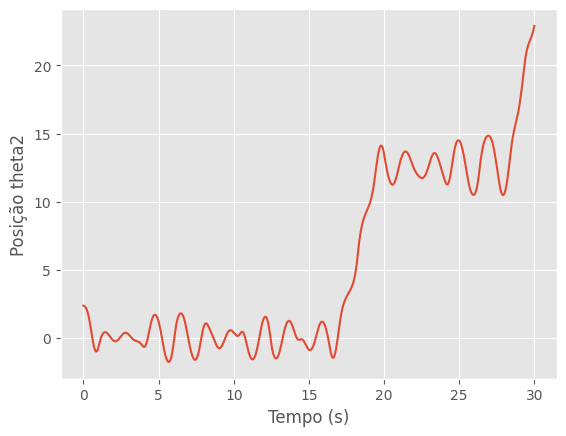

In [12]:
plt.plot(t, the2)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição theta2')

Text(0, 0.5, 'Posição y2')

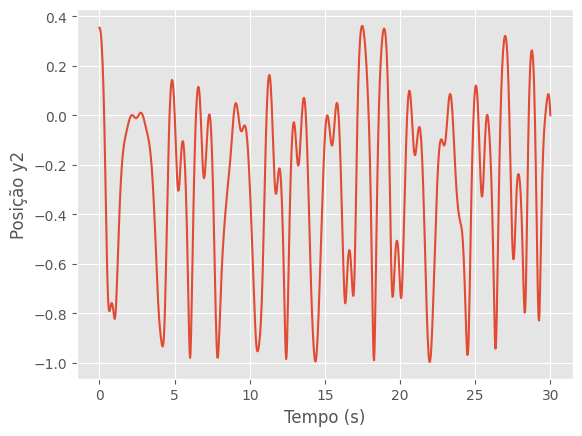

In [13]:
plt.plot(t,y2)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição y2')

Text(0, 0.5, 'Posição x2')

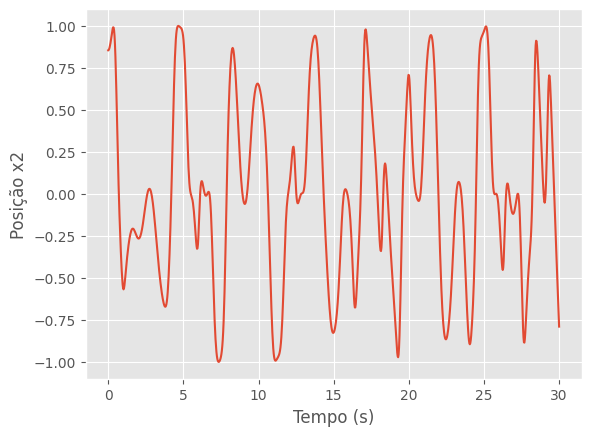

In [14]:
plt.plot(t,x2)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição x2')

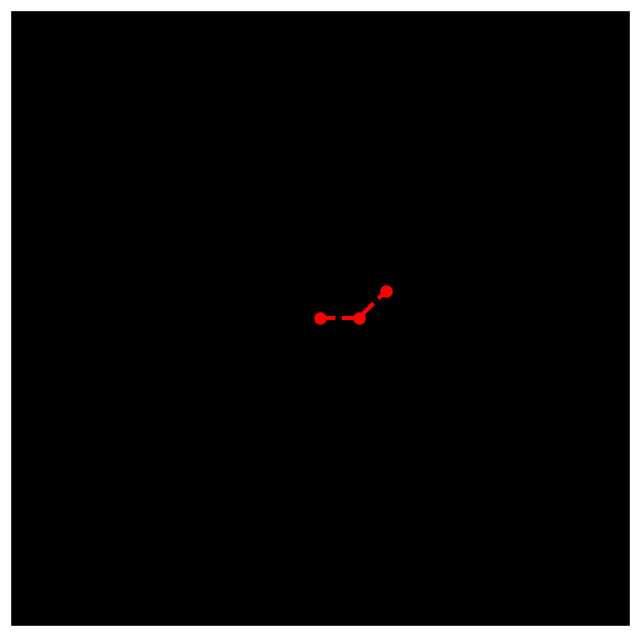

In [15]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)